## Analyze the Spatial Autocorrelation of 2016 Presidential Election Data
The aim of my project5 is to **analyze the spatial autocorrelation, clusters and outliers** of 2016 Presidential Election Data, **using the Global and Local Moran's I coefficient.**

The election data used in this project is under an open license, and can be download in https://public.opendatasoft.com/explore/dataset/us-2016-presidential-election-by-states/export/

**The main steps are:**<br>
**(1)** Pre-possess election data(.json file). <br>
**(2)** Merge the non spatial data, eletion.json with the spatial data, us_states.shp. <br>
**(3)** Choose K-Nearest Neighbor(KNN) as the spatial weight matrix.<br>
**(4)** Conduct Spatial Autocorrelation ( Global Moran's I ) analysis.<br>
**(5)** Conduct Clusters and Outliers  ( Local Moran's I ) analysis.<br>
**(6)** Plot the outcome data and maps.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot
import mapclassify
import libpysal

* Read json file.
* Useful election data is in the "fields".

In [2]:
data = pd.read_json("F:/Classes/1-SSCI 586/homework/Project5/data/election.json")
data.iloc[0:5,]

,datasetid,recordid,fields,record_timestamp
0,us-2016-presidential-election-by-states,645b0f8392ad899e85c533be972ba54f7d0fae1c,"{'libertarian': 2.74436873572, 'winner': 'Repu...",2018-10-12T04:41:19.843+08:00
1,us-2016-presidential-election-by-states,4a90ba26c0fbfe78c50097671de8ac7d9ff73c9b,"{'libertarian': 3.44307846063, 'winner': 'Repu...",2018-10-12T04:41:19.843+08:00
2,us-2016-presidential-election-by-states,d39e2e54a7cc79866d43a6b4f7947c8539fdcc34,"{'libertarian': 3.1986847242, 'winner': 'Democ...",2018-10-12T04:41:19.843+08:00
3,us-2016-presidential-election-by-states,4d20fa57113db75f7f63e466720f7dd0ad92fe11,"{'libertarian': 6.224300151, 'winner': 'Republ...",2018-10-12T04:41:19.843+08:00
4,us-2016-presidential-election-by-states,ce9efc10aa948f2850207237051d2f58cb18165c,"{'libertarian': 3.16071866179, 'winner': 'Repu...",2018-10-12T04:41:19.843+08:00


* Create a new DataFrame object with four columns : 'libertarian', 'winner', 'state', 'democratic', 'republican'.
* Use for loop to append data to the new DataFrame.
* The values of the 'democratic' and 'republican' columns represent Democratic % and Republican % of the presidential vote by states.

In [3]:
field = data['fields']

In [4]:
key = list()
for i in field.iloc[0].keys():
    key.append(i)
key

['libertarian', 'winner', 'state', 'democratic', 'republican']

In [5]:
alls = list()
i = 0
for i in range(len(field)):
    dic = field.iloc[i]
    values = list()
    for j in dic.values():
        a1 = values.append(j)
    i=i+1
    alls.append(values)
table1 = pd.DataFrame(alls,columns=key)

In [6]:
table1.iloc[0:5,]

,libertarian,winner,state,democratic,republican
0,2.744369,Republican,North Carolina,46.172866,49.828095
1,3.443078,Republican,Missouri,37.878071,56.389512
2,3.198685,Democratic,Vermont,56.677786,30.269435
3,6.224300,Republican,North Dakota,27.226739,62.955628
4,3.160719,Republican,Texas,43.235258,52.234686


* Read the shapefile of the U.S. states boundary.
* Keep the two useful fields "NAME" and "geometry".
* Rename the "NAME" to the corresponding "state" in the previous election data.

In [7]:
shp = gpd.read_file("F:/Classes/1-SSCI 586/homework/Project5/data/us_state.shp")
shp.iloc[0:5,]

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


* The spatial reference of the shapefile is "espg:4269", NAD 1983.

In [8]:
print(shp.crs)

{'init': 'epsg:4269'}


In [9]:
reshp = pd.DataFrame(None,columns=['state','geometry'])
reshp[['state','geometry']] = shp[['NAME','geometry']]
reshp.iloc[0:5,]

,state,geometry
0,Mississippi,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,North Carolina,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,Oklahoma,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,Virginia,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,West Virginia,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


* Merge the non spatial data with the spatial data.

In [10]:
join = reshp.merge(table1, on='state')
join.iloc[[26,39],]

,state,geometry,libertarian,winner,democratic,republican
26,Alaska,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ...",5.877128,Republican,36.550871,51.281512
39,Hawaii,"MULTIPOLYGON (((-156.06076 19.73055, -156.0566...",3.719427,Democratic,62.221492,30.038677


* Convert the DataFrame to GeoDataFrame, and define a new projection for it.
* **EPSG:4326** means that latitude and longitude coordinates on the **WGS-84** reference ellipsoid.

In [11]:
join_f = gpd.GeoDataFrame(join, crs="EPSG:4326")

In [12]:
print(join_f.crs)

EPSG:4326


### Use KNN spatial matrix to conduct analysis
* Create a spatial weight matrix based on the spatial structure of the input shapefile, U.S. states boundary.<br>

In this project, **KNN** method is selected as the spatial weight matrix, because there are 2 islands(disconnected components), Hawaii and Alaska, in the dataset. KNN is a common spatial weight matrix constructed based on k nearest neighbors. In this case, K is set as 5. <br>
 
A large part of the analysis result depends on the spatial weight matrix. Therefore, I would also use Queen spatial matrix to make a comparison, see if the results are different.

In [13]:
w = libpysal.weights.KNN.from_dataframe(join_f,k=5)

* Conduct spatial autocorrelation analysis, and caculate the **Global Moran's I coefficient** based on the Democratic % and Republican % of the presidential vote by states. The Global Moran focuses on the overall spatial structure.

**Moran'I coefficients** can be used to indicate whether the spatial pattern of the state election data expressed is **clustered, dispersed, or random**. 

(1) If the coefficient **> 0**, it means that there is positive spatial autocorrelation; 

(2) If the coefficient **< 0**, there is positive spatial autocorrelation; If the coefficient < 0, there is negative spatial autocorrelation; 

(3) If the coefficient is **near 0**, the features with the attribute data distribute randomly.

In this case, both the Global Morans are > 0, which means there is **positive spatial autocorrelation**.

In [14]:
from esda.moran import Moran

y_d = join_f['democratic'].values
moran_d = Moran(y_d, w)
moran_d.I

y_r = join_f['republican'].values
moran_r = Moran(y_r, w)
print(f'Global Moran\'s I: \n   Republican----{moran_r.I}, \n   Democratic----{moran_d.I}')

Global Moran's I: 
   Republican----0.3830439982848469, 
   Democratic----0.38741176333943483


* Use **p-value** to evaluate the Index

Moran's I is unlike most other correlation coefficients in that you can’t take the index at face value. It is an inferential statistic, and you have to determine statistical significance before you can read the result. This is done with a simple hypothesis test, calculating a z-score and its associated p-value.

In this case, both the coefficients are **reliable (p < 0.05)**.

In [15]:
print(moran_d.p_sim, moran_r.p_sim)

0.001 0.001


* Conduct the clusters and outliers analysis identifies spatial clusters and outliers of features with high or low values, using the **Local Moran's I coefficient**. The Llobal Moran focuses on the indibiduals.

**The Moran scatterplot** is used for visual exploration of spatial autocorrelation.

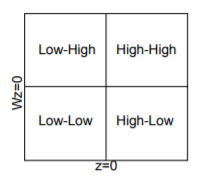

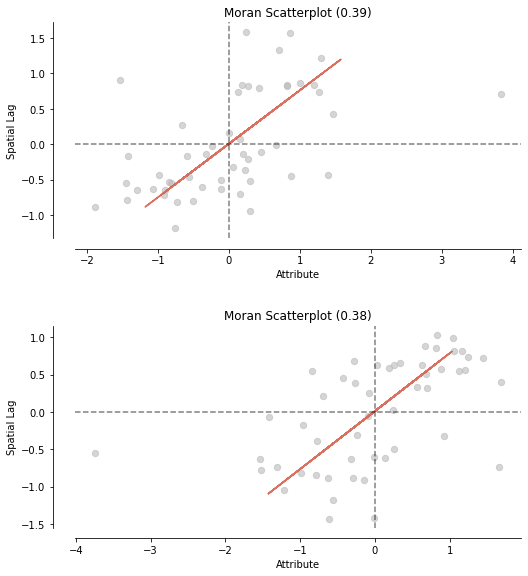

In [16]:
from splot.esda import moran_scatterplot

fig, axs = plt.subplots(2, figsize=(8,10),
                        subplot_kw={'aspect': 'equal'})

# Democratic % of the Presidential Vote by States, 2016
moran_scatterplot(moran_d, ax=axs[0])
# Republican % of the Presidential Vote by States, 2016
moran_scatterplot(moran_r, ax=axs[1])

plt.show()

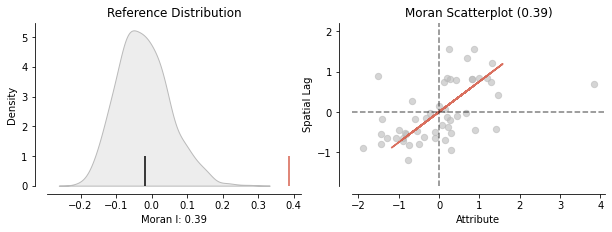

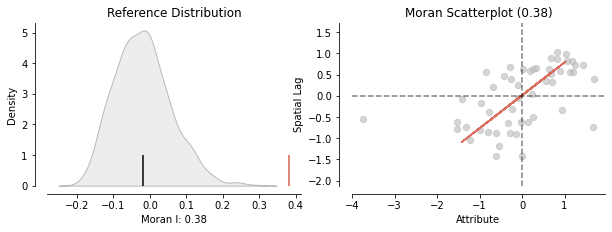

In [17]:
from splot.esda import plot_moran

plot_moran(moran_d, zstandard=True, figsize=(10,3))
plot_moran(moran_r, zstandard=True, figsize=(10,3))

plt.show()

* Plot two maps based on the original data.

(1) Republican % of the Presidential Vote by States, 2016

(2) Democratic % of the Presidential Vote by States, 2016

<span style="color:orange">***After researching online, the deprecated code of the warning seems to come from the original source code of the latest Scripy package*.</span>

D:\Anaconda3\envs\SSCI586\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda3\envs\SSCI586\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


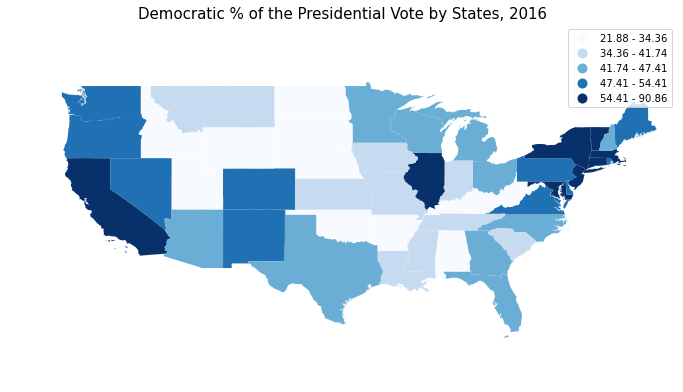

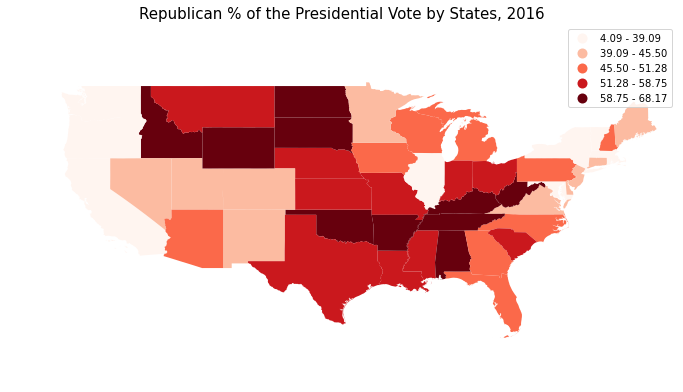

In [18]:
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'aspect':'equal'})
join_f.plot(column='democratic',legend=True, ax=ax, cmap='Blues', scheme='quantiles')
ax.set_xlim(-130,-65)
ax.set_ylim(20,55)
ax.set_title("Democratic % of the Presidential Vote by States, 2016", fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()

fig1, ax1 = plt.subplots(figsize=(12, 10), subplot_kw={'aspect':'equal'})
join_f.plot(column='republican',legend=True, ax=ax1, cmap='Reds', scheme='quantiles')
ax1.set_xlim(-130,-65)
ax1.set_ylim(20,55)
ax1.set_title("Republican % of the Presidential Vote by States, 2016", fontdict={'fontsize': '15', 'fontweight' : '3'})
ax1.set_axis_off()

* Given a threshold of the **p-value = 0.05**, select the results with **statistic significance** for Local Autocorrelation analysis. 
* **Points are colored by significance**.

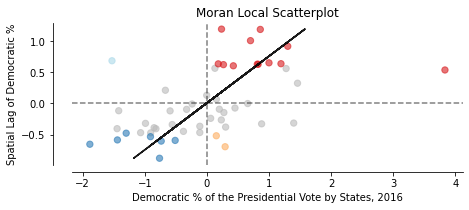

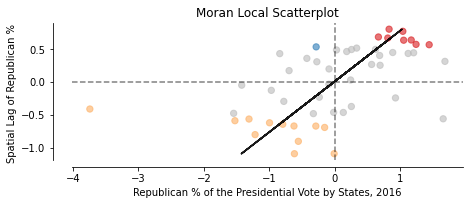

In [19]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_loc_d = Moran_Local(y_d, w)
fig, ax = moran_scatterplot(moran_loc_d, p=0.05)
ax.set_xlabel('Democratic % of the Presidential Vote by States, 2016')
ax.set_ylabel('Spatial Lag of Democratic %')

moran_loc_r = Moran_Local(y_r, w)
fig1, ax1 = moran_scatterplot(moran_loc_r, p=0.05)
ax1.set_xlabel('Republican % of the Presidential Vote by States, 2016')
ax1.set_ylabel('Spatial Lag of Republican % ')

plt.show()

* Plot two maps based on the **Local Moran Scatterplot**.

(1) Geographic Clustering Based on Democratic % Presidential Vote by States, 2016

(2) Geographic Clustering Based on Republican % Presidential Vote by States, 2016

**The Lengend of the Result Map:**

* **HH & LL** - Statistically significant clusters of high values (HH), clusters of low values (LL).
* **HL & LH** - Outliers in which a high value is surrounded primarily by low values (HL), and outliers in which a low value is surrounded primarily by high values (LH).
* **ns** - Not Statistically significant.

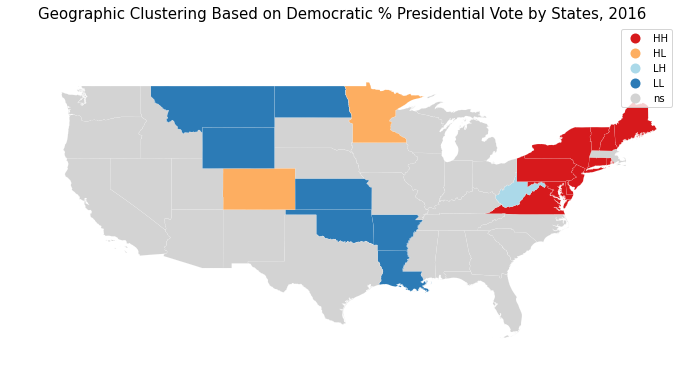

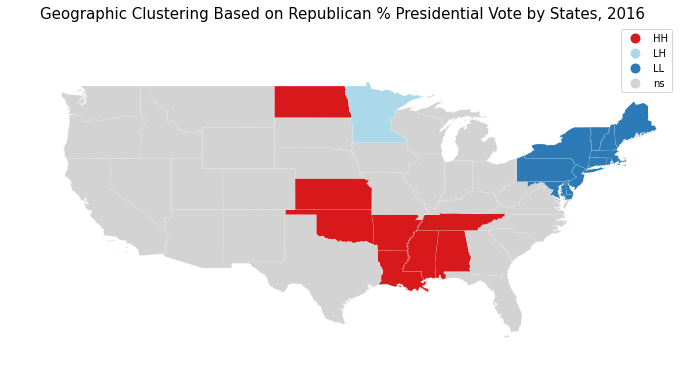

In [20]:
from splot.esda import lisa_cluster

fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
ax.set_xlim(-130,-65)
ax.set_ylim(20,55)
ax.set_title("Geographic Clustering Based on Democratic % Presidential Vote by States, 2016", fontdict={'fontsize': '15', 'fontweight' : '3'})
lisa_cluster(moran_loc_d, join_f, p=0.05, ax=ax)

fig1, ax1 = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
ax1.set_xlim(-130,-65)
ax1.set_ylim(20,55)
ax1.set_title("Geographic Clustering Based on Republican % Presidential Vote by States, 2016", fontdict={'fontsize': '15', 'fontweight' : '3'})
lisa_cluster(moran_loc_r, join_f, p=0.05, ax=ax1)

plt.show()

### Use Queen spatial matrix to make a comparison, see if the result is different

Queen spatial matrix is constructed from a collection of neighbors that share at least one vertex. 

* Remove the 2 islands(disconnected components) in the dataset for building a Queen spatial matrix.
* Calculate the Global Moran Coefficient.
* Calculate the Local Moran Coefficient.
* Plot maps.

**The results are different from the KNN spatial matrix.**

**In my opinion, KNN spatial matrix is more suitable for my study.**

In [21]:
join_q = join_f.drop([26 , 39], inplace = False ) 
w2 = libpysal.weights.Queen.from_dataframe(join_q)
from esda.moran import Moran

y_d = join_q['democratic'].values
moran_d2 = Moran(y_d, w2)
moran_d2.I

y_r = join_q['republican'].values
moran_r2 = Moran(y_r, w2)
print(f'Global Moran\'s I: \n   Republican----{moran_r2.I},\n   Democratic----{moran_d2.I}')
print(f'p-value: {moran_d.p_sim}, {moran_r.p_sim}')

Global Moran's I: 
   Republican----0.38264552445203553,
   Democratic----0.38908452961414075
p-value: 0.001, 0.001


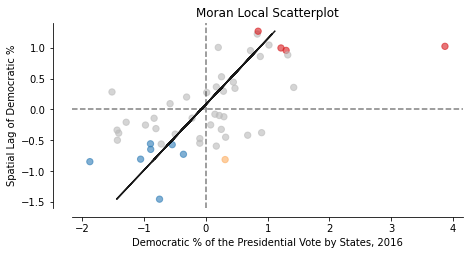

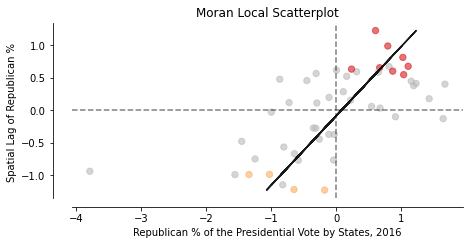

In [22]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_loc_d2 = Moran_Local(y_d, w2)
fig, ax = moran_scatterplot(moran_loc_d2, p=0.05)
ax.set_xlabel('Democratic % of the Presidential Vote by States, 2016')
ax.set_ylabel('Spatial Lag of Democratic %')

moran_loc_r2 = Moran_Local(y_r, w2)
fig1, ax1 = moran_scatterplot(moran_loc_r2, p=0.05)
ax1.set_xlabel('Republican % of the Presidential Vote by States, 2016')
ax1.set_ylabel('Spatial Lag of Republican % ')

plt.show()

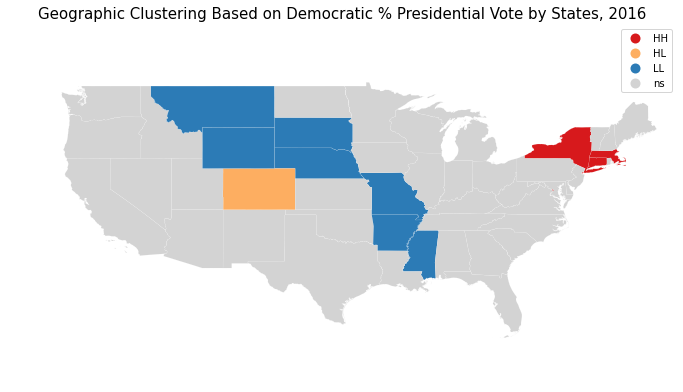

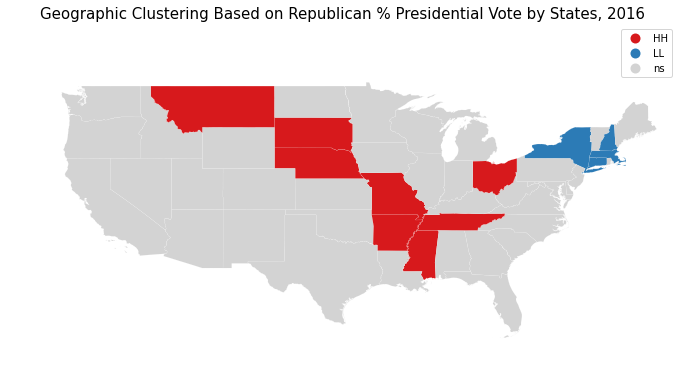

In [23]:
from splot.esda import lisa_cluster

fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
ax.set_xlim(-130,-65)
ax.set_ylim(20,55)
ax.set_title("Geographic Clustering Based on Democratic % Presidential Vote by States, 2016", fontdict={'fontsize': '15', 'fontweight' : '3'})
lisa_cluster(moran_loc_d2, join_q, p=0.05, ax=ax)

fig1, ax1 = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
ax1.set_xlim(-130,-65)
ax1.set_ylim(20,55)
ax1.set_title("Geographic Clustering Based on Republican % Presidential Vote by States, 2016", fontdict={'fontsize': '15', 'fontweight' : '3'})
lisa_cluster(moran_loc_r2, join_q, p=0.05, ax=ax1)

plt.show()